In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import Select, SelectMultiple,  Layout, Box, Label
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from windrose import WindroseAxes
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
import umap.umap_ as umap

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#поиск всех файлов в папке
files = []
for file in os.listdir("."):
    if file.endswith('.csv'):
        files.append(file) 
        
if len(files) != 0:

    fileselect = Select(
        options=files,
        value=files[0],
        description='Select file:',
        disabled=False
    )
fileselect

Select(description='Select file:', options=('0.csv', '1.csv', '3.csv', '2.csv', 'pokedex.csv'), value='0.csv')

In [3]:
df = pd.read_csv(fileselect.value, delimiter=",")
df.columns = df.columns.str.strip()
df.fillna(0)
df.describe()

Unnamed: 0  pokedex_number   generation  type_number     height_m  \
count  1028.000000     1028.000000  1028.000000  1028.000000  1028.000000   
mean    513.500000      437.711089     4.034047     1.527237     1.368093   
std     296.902341      259.366480     2.234937     0.499501     3.380126   
min       0.000000        1.000000     1.000000     1.000000     0.100000   
25%     256.750000      213.750000     2.000000     1.000000     0.600000   
50%     513.500000      433.500000     4.000000     2.000000     1.000000   
75%     770.250000      663.250000     6.000000     2.000000     1.500000   
max    1027.000000      890.000000     8.000000     2.000000   100.000000   

         weight_kg  abilities_number  total_points           hp       attack  \
count  1027.000000       1028.000000   1028.000000  1028.000000  1028.000000   
mean     69.753749          2.284047    437.571984    69.577821    80.119650   
std     129.221230          0.794981    121.664910    26.385849    32.372321   
min       0.100000          0.000000    175.000000     1.000000     5.000000   
25%       8.800000          2.000000    330.000000    50.000000    55.000000   
50%      28.500000          2.000000    455.000000    66.500000    76.000000   
75%      69.100000          3.000000    510.000000    80.000000   100.000000   
max     999.900000          3.000000   1125.000000   255.000000   190.000000   

       ...  against_ground  against_flying  against_psychic  against_bug  \
count  ...     1028.000000     1028.000000      1028.000000  1028.000000   
mean   ...        1.084630        1.166342         0.979329     0.992461   
std    ...        0.784937        0.593030         0.499146     0.598301   
min    ...        0.000000        0.250000         0.000000     0.000000   
25%    ...        0.500000        1.000000         1.000000     0.500000   
50%    ...        1.000000        1.000000         1.000000     1.000000   
75%    ...        1.625000        1.000000         1.000000     1.000000   
max    ...        4.000000        4.000000         4.000000     4.000000   

       against_rock  against_ghost  against_dragon  against_dark  \
count   1028.000000    1028.000000     1028.000000   1028.000000   
mean       1.239786       1.010700        0.975681      1.065661   
std        0.699156       0.558533        0.377549      0.451054   
min        0.250000       0.000000        0.000000      0.250000   
25%        1.000000       1.000000        1.000000      1.000000   
50%        1.000000       1.000000        1.000000      1.000000   
75%        2.000000       1.000000        1.000000      1.000000   
max        4.000000       4.000000        2.000000      4.000000   

       against_steel  against_fairy  
count    1028.000000    1028.000000  
mean        0.980302       1.084874  
std         0.503434       0.527743  
min         0.000000       0.000000  
25%         0.500000       1.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max         4.000000       4.000000  

[8 rows x 38 columns]

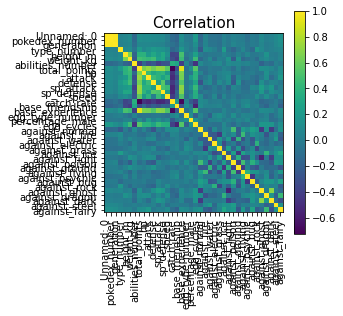

In [4]:
#корреляция 
# df = df.drop('Rank', 1)
corr = df.corr()
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title("Correlation", fontsize=15)
plt.show()

In [9]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])

oneSelect = Select(
        options=list(ddf.columns),
        value=list(ddf.columns)[0],
        description='Выберите поле:',
        disabled=False
    )
oneSelect

Select(description='Выберите поле:', options=('Unnamed: 0', 'pokedex_number', 'generation', 'type_number', 'he…

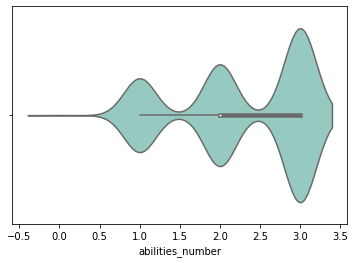

In [17]:
#Виолин
left = oneSelect.value
ax = sns.violinplot(x=left,
                    data=df,
                    scale="width", palette="Set3", dodge=False)

In [18]:
#оставляем только численные поля
ddf = df.select_dtypes(include=['number'])
select = SelectMultiple(
    options=list(ddf.columns),
    value=[list(ddf.columns)[0]],
    description='Поля парного сочетания: ',
    disabled=False
)
select



SelectMultiple(description='Поля парного сочетания: ', index=(0,), options=('Unnamed: 0', 'pokedex_number', 'g…

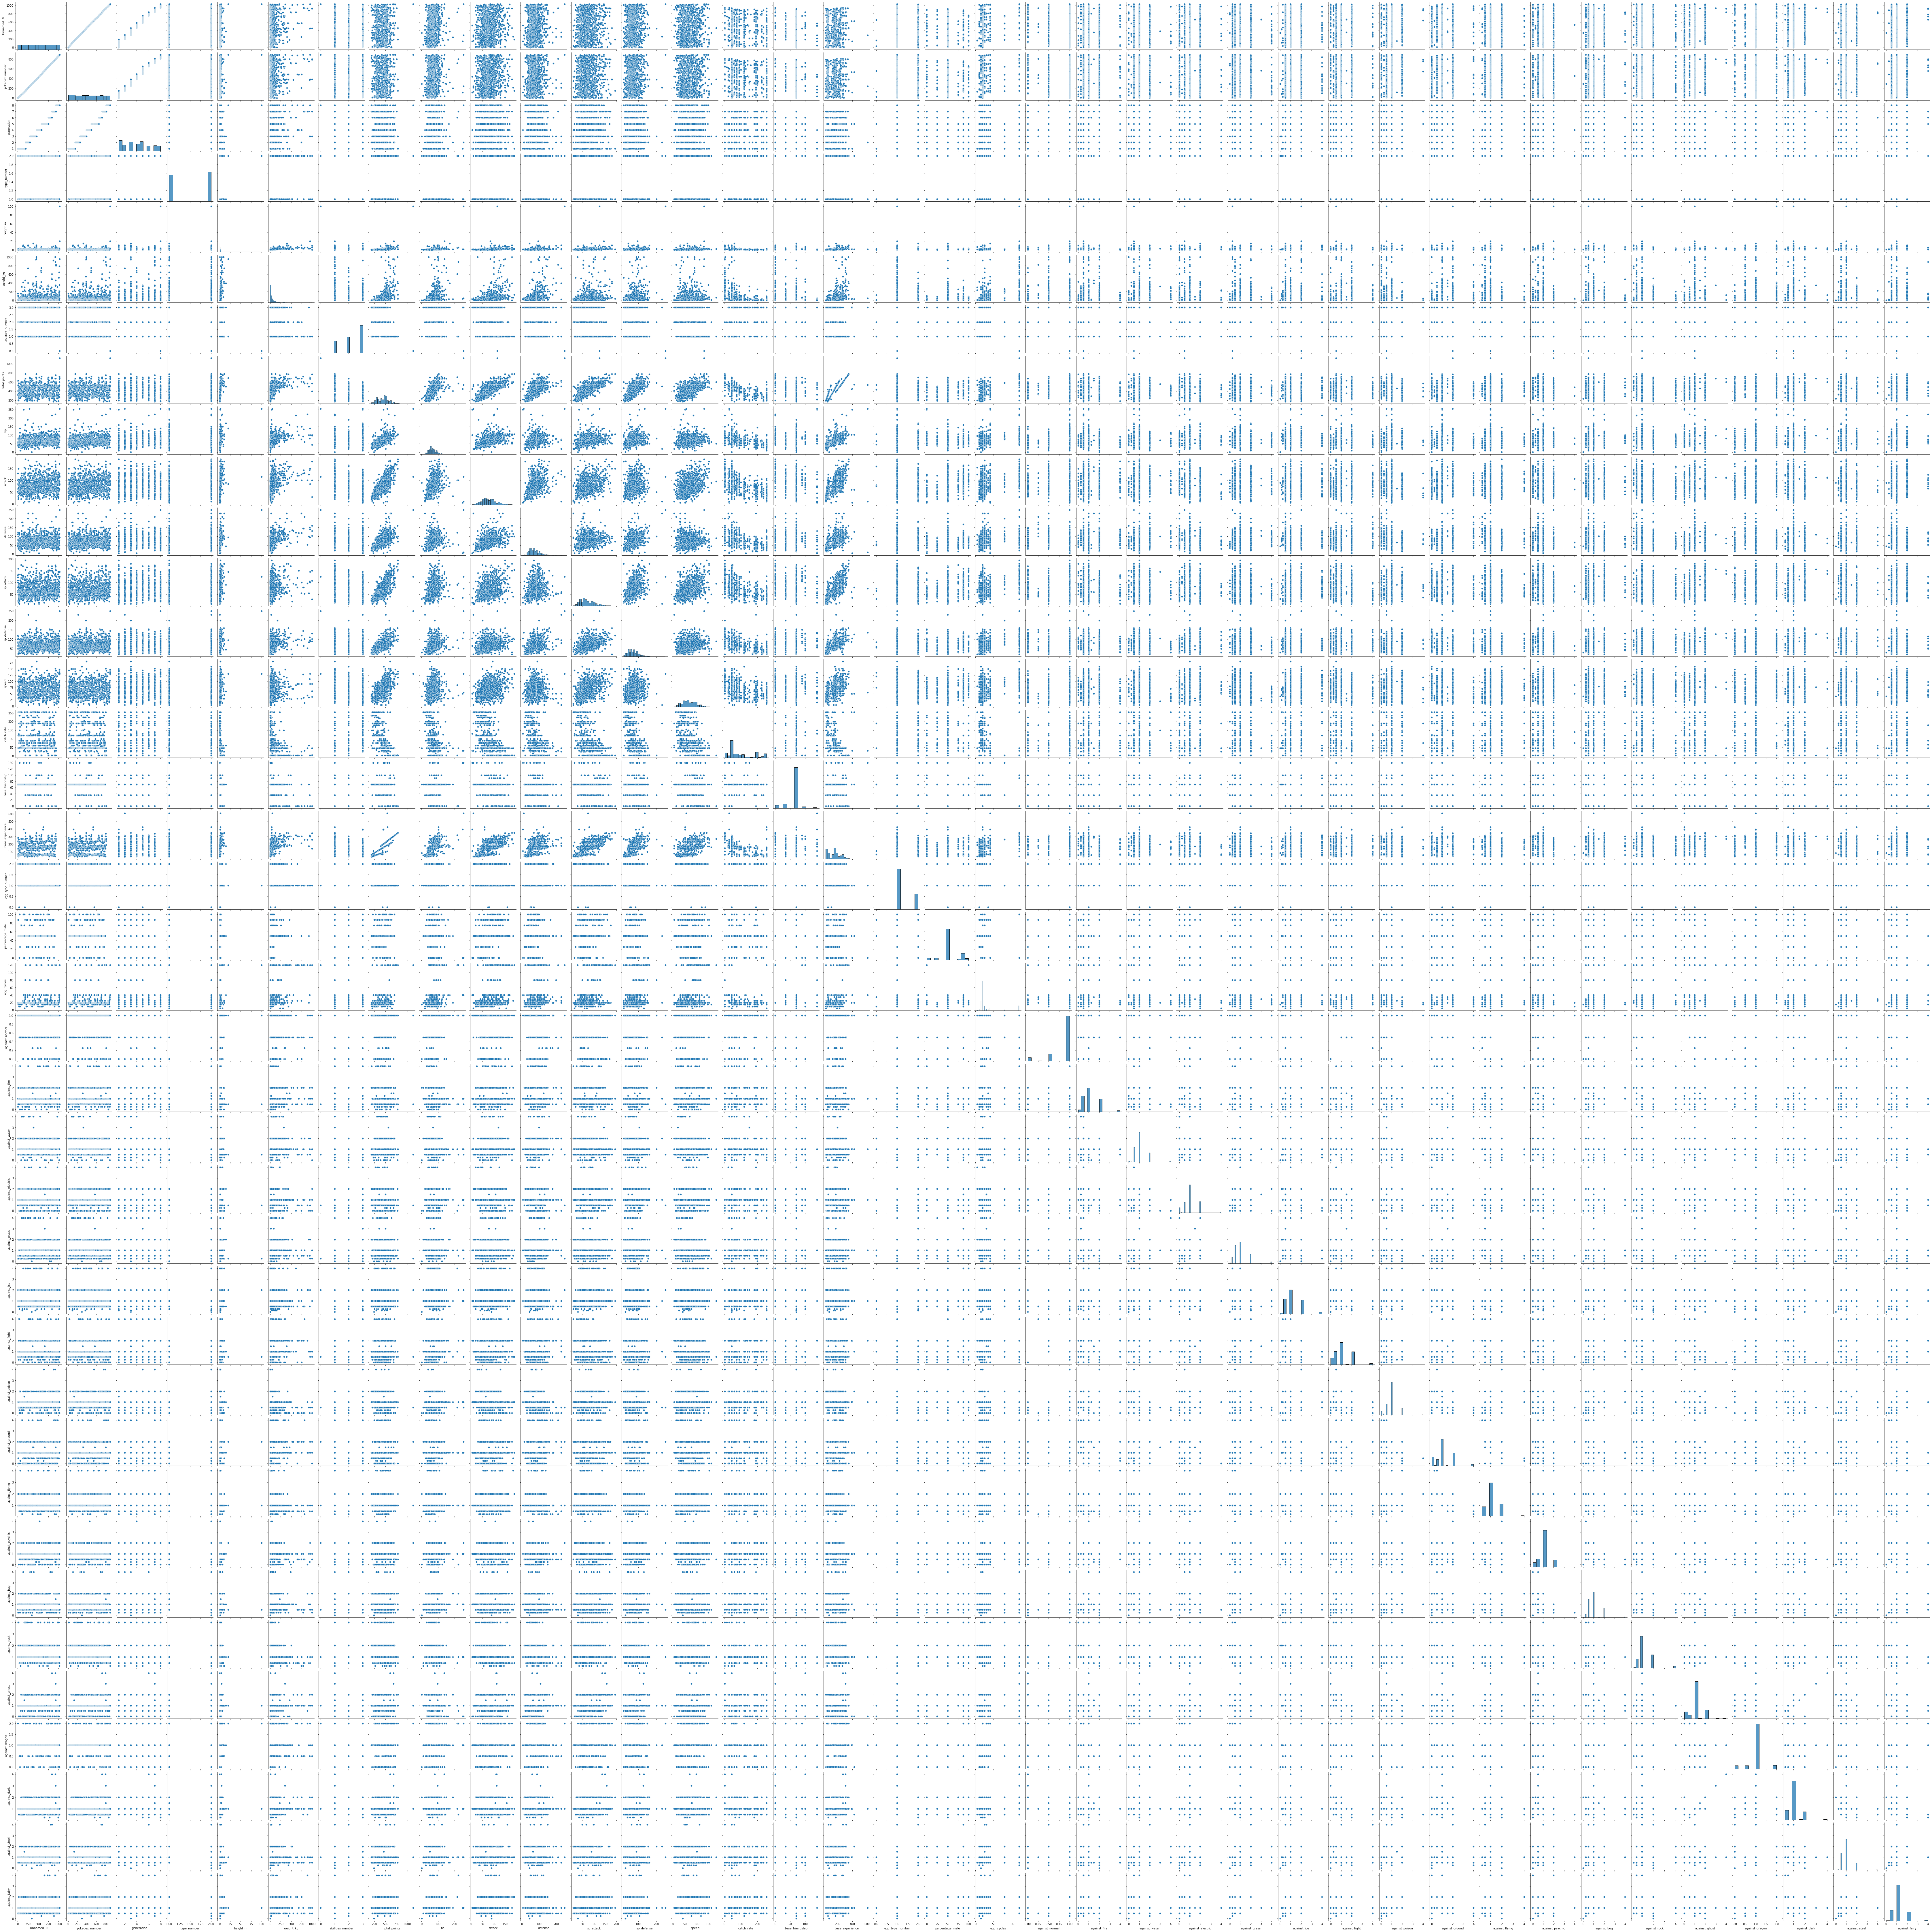

In [21]:
#все возможные пары (тут хорошо видно кластеры)
ddf = df[list(select.value)]
sns.pairplot(ddf)

In [22]:
form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='x: '), Select(
    options=list(df.columns),
    disabled=False
)], layout=form_item_layout),
 Box([Label(value='y: '), Select(
    options=list(df.columns),
    disabled=False
)], layout=form_item_layout),
    Box([Label(value='z: '), Select(
    options=list(df.columns),
    disabled=False
)], layout=form_item_layout),
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))

In [23]:
form

Box(children=(Box(children=(Label(value='x: '), Select(options=('Unnamed: 0', 'pokedex_number', 'name', 'germa…

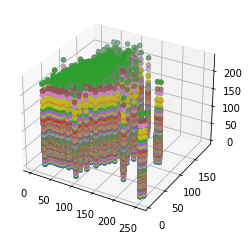

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df[form.children[0].children[1].value]
y =  df[form.children[1].children[1].value]
z =  df[form.children[2].children[1].value]
for i in range(len(z[:1000])):
    ax.scatter(x[:1000], y[:1000], z[i])

plt.show()

In [25]:
select

SelectMultiple(description='Поля парного сочетания: ', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

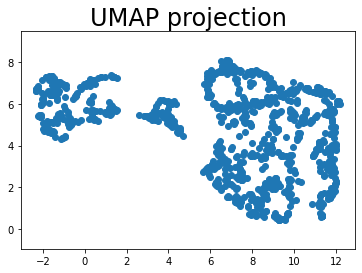

In [33]:
df.fillna(0)
df_data = df[
        list(select.value)
    ].values
reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(df_data)
embedding = reducer.fit_transform(scaled_data)
plt.figure(0)
plt.scatter(
    embedding[:, 0],
        embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
fig = plt.gcf()
# fig.show()

In [37]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

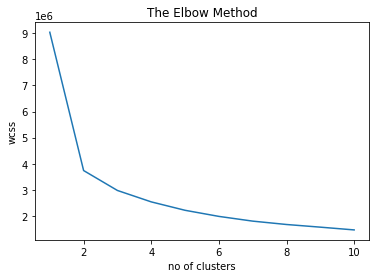

In [39]:
# локоть
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(df_data)
    score.append(kmeans.inertia_)


plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Для n_clusters = 2 Средний показатель silhouette_score равен: 0.5254061601807775
Для n_clusters = 3 Средний показатель silhouette_score равен: 0.29888304488115097
Для n_clusters = 4 Средний показатель silhouette_score равен: 0.27912260223026913
Для n_clusters = 5 Средний показатель silhouette_score равен: 0.28186266500113716
Для n_clusters = 6 Средний показатель silhouette_score равен: 0.27109650083120285
Для n_clusters = 7 Средний показатель silhouette_score равен: 0.2568431500634105
Для n_clusters = 8 Средний показатель silhouette_score равен: 0.2503547903729113
Для n_clusters = 9 Средний показатель silhouette_score равен: 0.24730704928984001
Для n_clusters = 10 Средний показатель silhouette_score равен: 0.2547248256519258


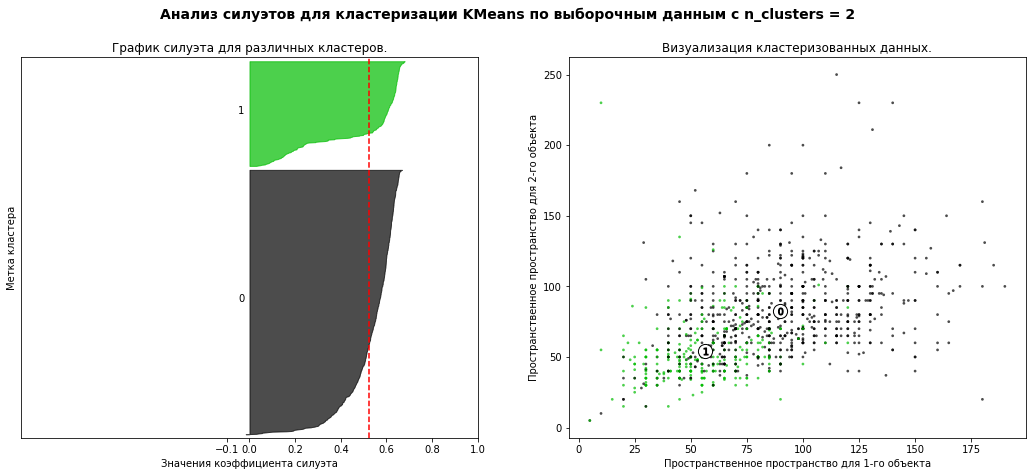

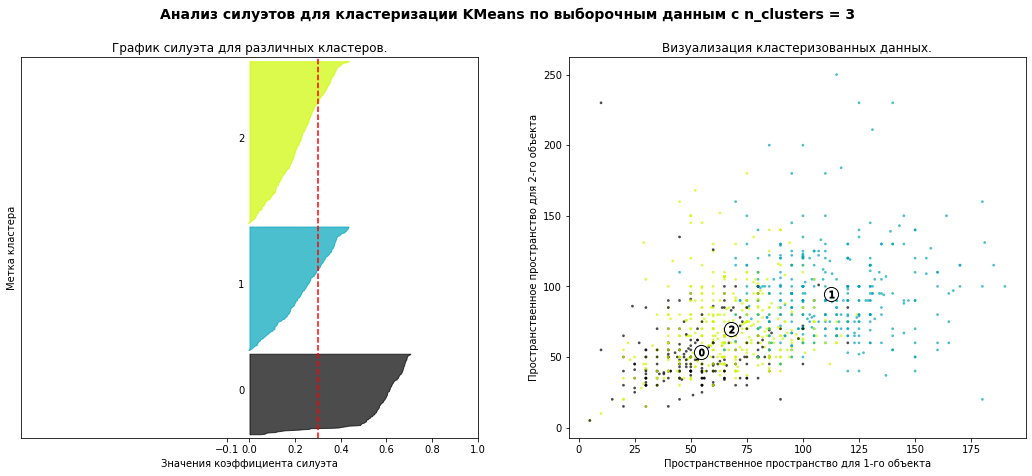

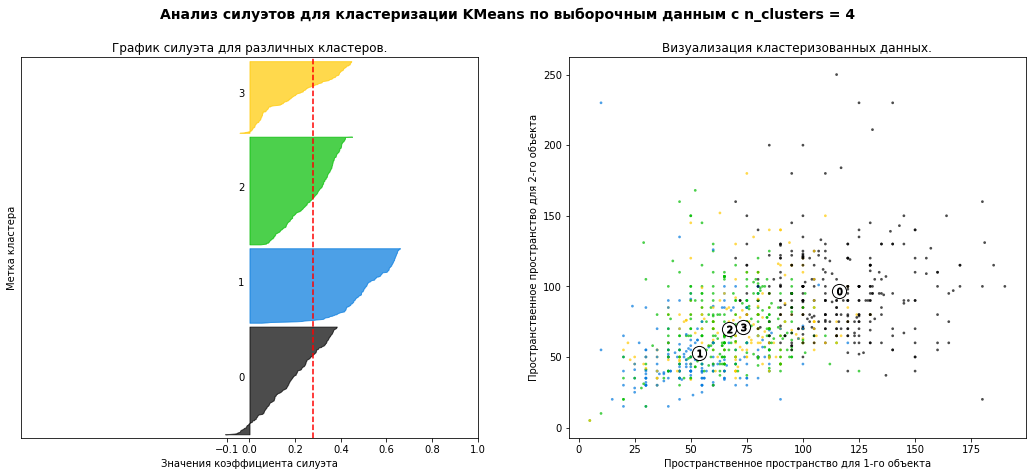

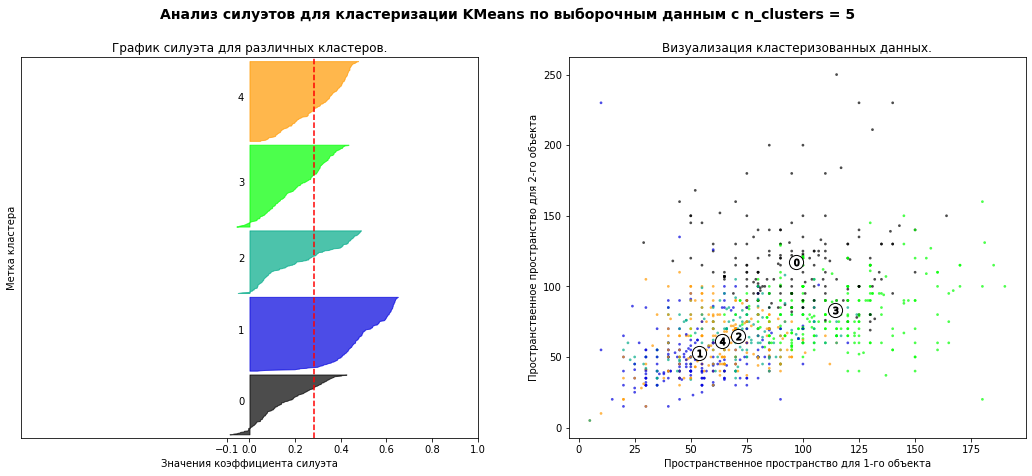

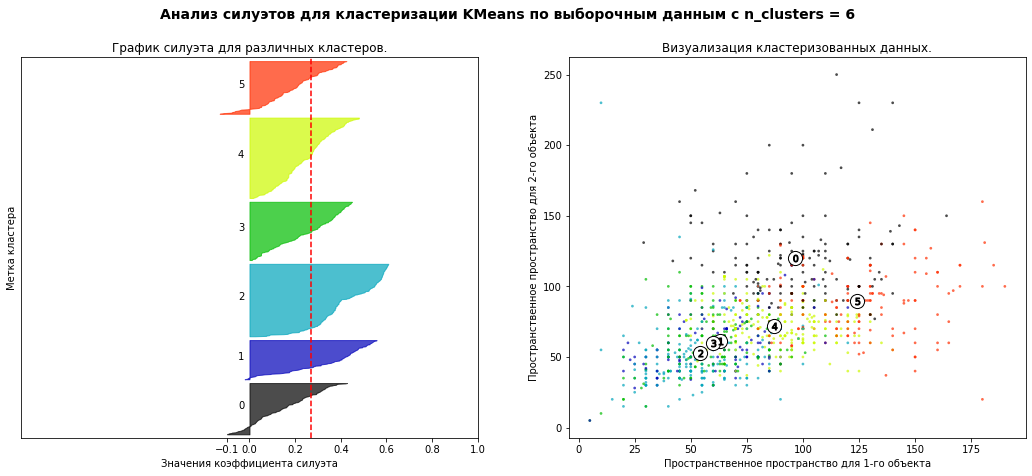

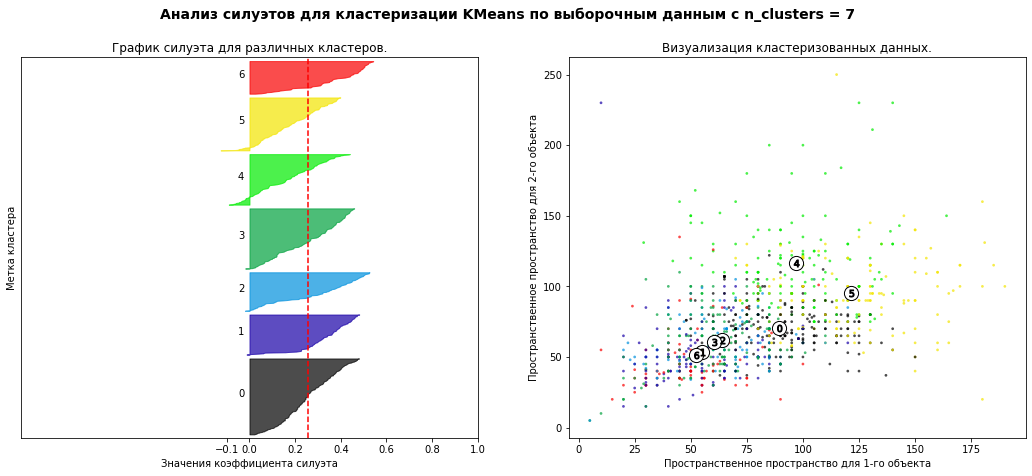

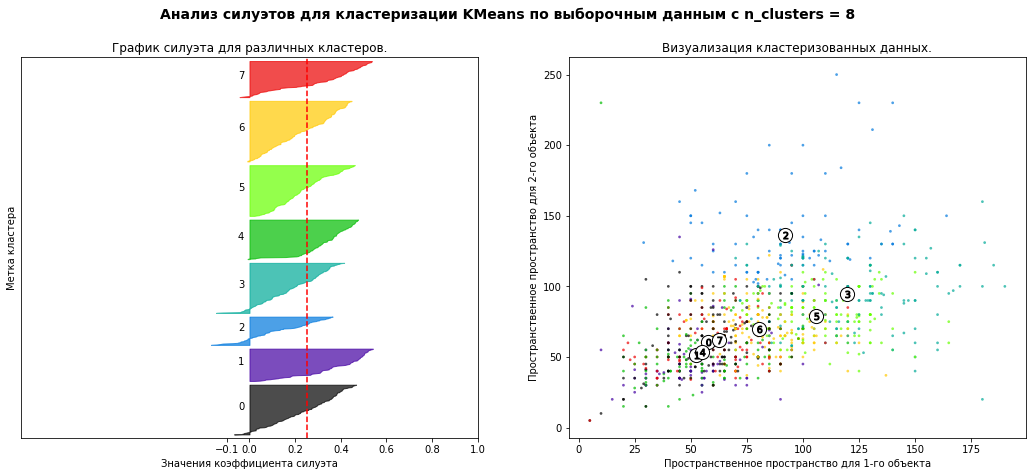

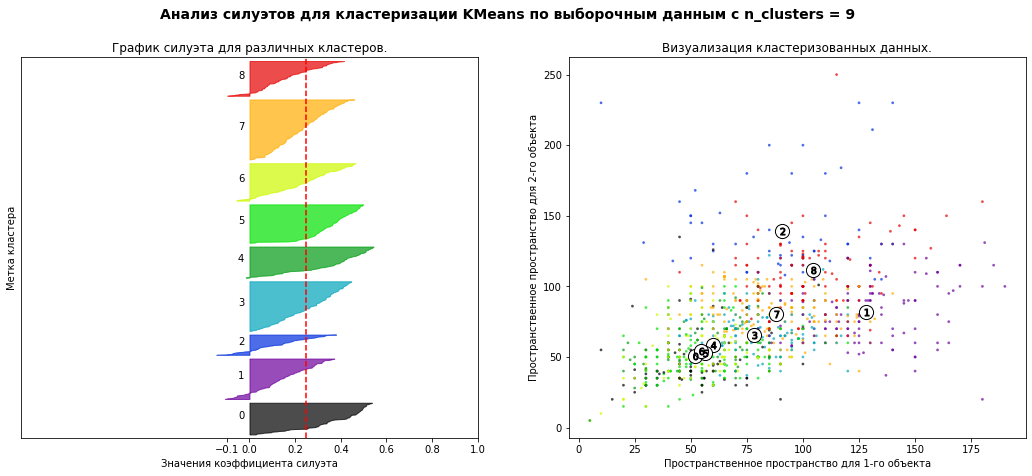

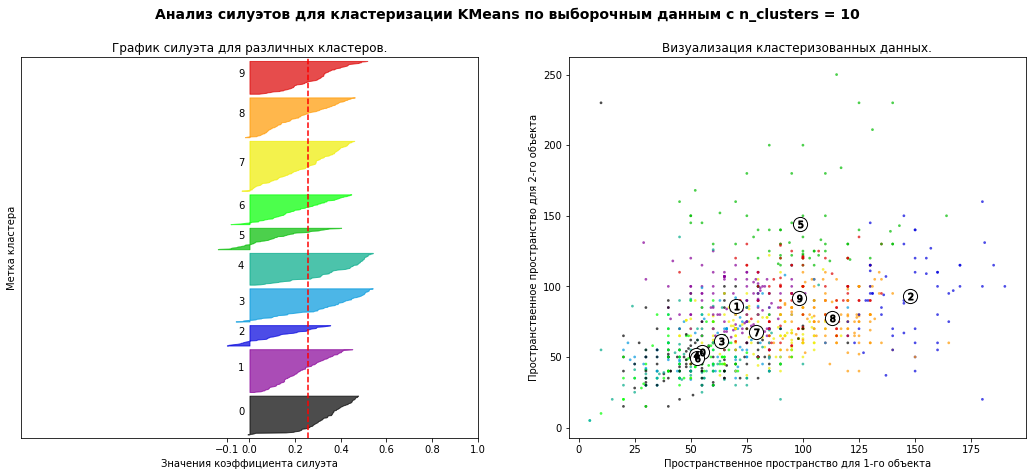

In [41]:
# силуэт
for n_clusters in range(2,11):
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й подзаголовок - это силуэтный сюжет
    # Коэффициент силуэта может варьироваться от -1, 1
    ax1.set_xlim([-1, 1])
    # (n_clusters+1)*10 предназначен для вставки пустого пространства между силуэтами
    # участки отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(df_data) + (n_clusters + 1) * 10])

    # Инициализируйте кластеризатор значением n_clusters и начальным значением генератора случайных чисел 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_data)

    # Значение silhouette_score дает среднее значение для всех выборок.
    # Это дает представление о плотности и разделении сформированных
    # кластеры
    silhouette_avg = silhouette_score(df_data, cluster_labels)
    print("Для n_clusters =", n_clusters,
          "Средний показатель silhouette_score равен:", silhouette_avg)

    # Вычислите оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(df_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Агрегируйте оценки силуэта для образцов, принадлежащих к кластеру i, и сортируйте их
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Пометьте участки силуэта номерами кластеров в середине
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислите новый y_lower для следующего участка
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("График силуэта для различных кластеров.")
    ax1.set_xlabel("Значения коэффициента силуэта")
    ax1.set_ylabel("Метка кластера")

    # Вертикальная линия для средней оценки силуэта всех значений
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистите метки / галочки yaxis
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_data[:, 0], df_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Визуализация кластеризованных данных.")
    ax2.set_xlabel("Пространственное пространство для 1-го объекта")
    ax2.set_ylabel("Пространственное пространство для 2-го объекта")

    plt.suptitle(("Анализ силуэтов для кластеризации KMeans по выборочным данным "
                  "c n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()